In [1]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
import random
import cv2
from PIL import Image
from skimage import morphology
from collections import Counter

In [24]:
test_folder='../../data/raw/example_image/'
test_folder1 = '../../data/raw/example_segmentation/'
ground_truth = '../../data/raw/example_ground_truth.csv'
ground_truth = pd.read_csv(ground_truth)
ground_truth = ground_truth.set_index('image_id')
file1 = os.listdir(test_folder1)
file = os.listdir(test_folder)
#image_path= os.path.join(test_folder,file)
#print(image_path)
#img=plt.imread(image_path)

#removing all the superpixels images and getting all the colored images in a list
color_images_paths = []
segmentation = []
for i in file:
    image_path= os.path.join(test_folder,i)
    if not i.endswith('superpixels.png'):
        color_images_paths.append(image_path)
colored_images = sorted(color_images_paths[1:]) #right one bcs the first one is weird DS STORE thing, IDK IF THE SORTED THING DOES ANYTHING
for i in file1:
    image_path1 = os.path.join(test_folder1,i)
    segmentation.append(image_path1)
both = list(zip(colored_images,segmentation)) #having both in a list of tuples

#splitting the images
keratosis_images = ground_truth.index[ground_truth['seborrheic_keratosis'] == 1.0].tolist()
melanoma_images = ground_truth.index[ground_truth['melanoma'] == 1.0].tolist()
healthy_images = ground_truth[(ground_truth['seborrheic_keratosis'] == 0.0) & (ground_truth['melanoma'] == 0.0)]

In [3]:
#def rgb2gray(rgb):
#    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
#image_path= os.path.join(test_folder1,file[1])
#img=plt.imread(image_path)
##print(img)
#grey = rgb2gray(img)
#plt.imshow(grey)
#print(grey)

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [5]:
#for i in load_images_from_folder(test_folder1):
    #print(i.shape)

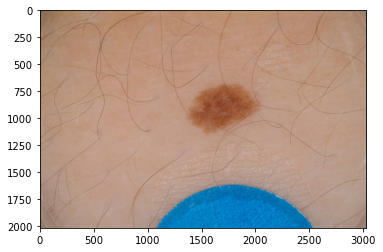

In [6]:
image_path1 = os.path.join(test_folder1,file1[0])
image_path = os.path.join(test_folder,file[1])
img1 = plt.imread(image_path1)
img = plt.imread(image_path)
plt.imshow(img)

../../data/raw/example_segmentation/ISIC_0001769_segmentation.png
../../data/raw/example_image/ISIC_0001769.jpg


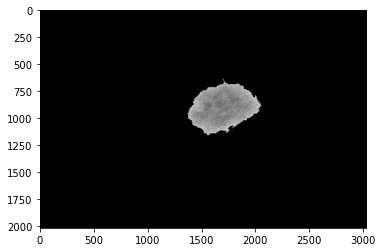

In [7]:
#CORRECT
im1 = Image.open(image_path)
im2 = Image.open(image_path1)
im2.paste(im1, (0,0), mask = im2) 
  
# Display 
im2.show()  
plt.imshow(im2, cmap='gray')


# Note that this is a single channel image
print(image_path1) 
print(image_path)

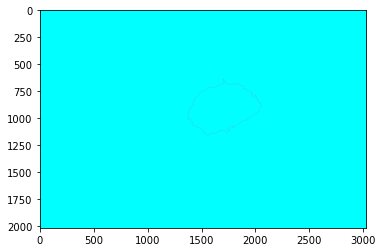

In [8]:
#CORRECT
im = plt.imread('../../data/Raw/example_image/ISIC_0001769.jpg')
mask=plt.imread('../../data/Raw/example_segmentation/ISIC_0001769_segmentation.png')
area = np.sum(mask)
#print(area)
struct_el = morphology.disk(1)
mask_eroded = morphology.binary_erosion(mask, struct_el)
image_perimeter = mask - mask_eroded
#print(image_perimeter)
#print(np.sum(image_perimeter))
plt.imshow(image_perimeter,cmap = 'cool')

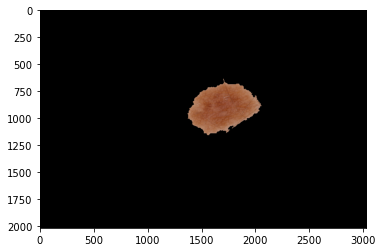

In [9]:
#MEASURE AND MAYBE MAKE AN AVERAGE OF RGB COLORS<HOW TO DETECT IF THIS IS BENING OR MALIGN BASED ON COLOR?>
im1 = im.copy()
im1[mask==0] = 0
new_arr_no_0 = im1[np.where(im1!=0)]
#CROP FOR EVERY PICTURE < FOR BETTER PERFORMANCE
#plt.imshow(im1)
mask2 = im1[600:1200,1300:2100,:]
plt.imshow(im1)

In [10]:
# COLOUR COUNTS FOR POSSIBLE COLOR ANALYSIS
color_count = {}
#width, height = image.size
image = Image.fromarray(mask2)
rgb_image = image.convert('RGB')

rgb = rgb_image.getpixel((686, 519))
print(rgb)

(0, 0, 0)


In [11]:
image = cv2.imread('../../data/Raw/example_segmentation/ISIC_0001769_segmentation.png')

In [12]:
def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

[[  0   0   0]
 [  1   0   0]
 [  2   0   0]
 ...
 [  0 686 519]
 [  1 686 519]
 [  2 686 519]]


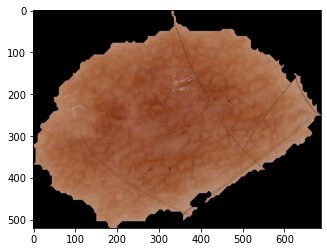

In [13]:
img2 = crop(im1)
plt.imshow(img2)
xy_coords = np.flip(np.column_stack(np.where(img2 >= 0)), axis=1)
xy_coords
a_del = np.delete(xy_coords, 0, 1)
a_del = a_del[::3][:, [0, 1]] #python dark magic
print(xy_coords)

In [14]:
rgb1 = [rgb_image.getpixel((int(i[0]),int(i[1]))) for i in a_del]
print(len(rgb1))

357240


In [15]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [16]:
#RGB2HEX
dd = [RGB2HEX(i) for i in rgb1]
ss = list(set(dd))
counter_colours = Counter(dd) #count occurences in the colours

In [17]:
#to do create a function that takes all the images, takes all of their colour occurences, 
#split them by healthy or unhealthy, and then compare colour variation

In [18]:
def colour_reader(img,mk):
    im = plt.imread(img)
    #mask is the gray segmentation mask
    mask = plt.imread(mk)
    #putting the color over the mask
    im1 = im.copy()
    im1[mask==0] = 0 #again python dark magic
    #now for better performance we have to crop the image to it's extremities by calling the crop function
    img2 = crop(im1)
    #we have to get the coordinates of every pixel in the image so
    xy_coords = np.flip(np.column_stack(np.where(img2 >= 0)), axis=1)
    #if we print xy_coords they will appear three times because every pixel has three colour coordinates, namely RGB,thus
    #I have to delete the first column(which is 0,1,2) and the duplicates
    a_del = np.delete(xy_coords, 0, 1)
    a_del = a_del[::3][:, [0, 1]] #python dark magic
    #now we get all the rgb colours from every pixel in our picture
    image = Image.fromarray(img2)
    rgb_image = image.convert('RGB')
    rgb1 = [rgb_image.getpixel((int(i[0]),int(i[1]))) for i in a_del]
    #now to reduce it as much as we can we turn it to hexcodes so we don't have tuples of 3 values and we eliminate duplicates
    dd = [RGB2HEX(i) for i in rgb1]
    ss = list(set(dd)) #ye,I know
    #now just a nice thing, to count how many colours appear in our picture, first one is useless since it will always be black
    counter_colours =  Counter(dd)
    #popping the black color
    counter_colours.pop('#000000')
    return counter_colours

In [19]:
imm = '../../data/Raw/example_image/ISIC_0001769.jpg'
maskk='../../data/raw/example_segmentation/ISIC_0001769_segmentation.png'

In [20]:
#colour_reader(imm,maskk) #ignore the #00000 is the black one, will always be the most, update : I popped the black one :)

In [21]:
%%timeit
#a for loop to go through all the images and get the color counts :)
noice_dict = dict()
for i in both[:10]:
    noice_dict[i[0]] = colour_reader(i[0],i[1])

19.7 s ± 839 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
